In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF

In [3]:
df = pd.read_excel('Completions_DataSet.xlsx')
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
dfs = pd.DataFrame(scaled_features)

In [10]:
df

,Stage Spacing,Cluster Spacing,Sand per ft (# per ft),Water per ft (gal per ft)
0,173.4,45.5,1117.2,10.0
1,166.6,39.0,1117.2,10.0
2,159.8,41.6,1037.4,10.0
3,156.4,40.3,1197.0,10.0
4,170.0,46.8,1117.2,10.0
...,...,...,...,...
139,234.6,40.3,4309.2,105.0
140,227.8,40.3,4468.8,120.0
141,234.6,40.3,4069.8,115.0
142,197.2,35.1,4069.8,95.0


# PCA

In [4]:
pc = PCA(n_components=3)
pca_tran = pc.fit_transform(scaled_features)


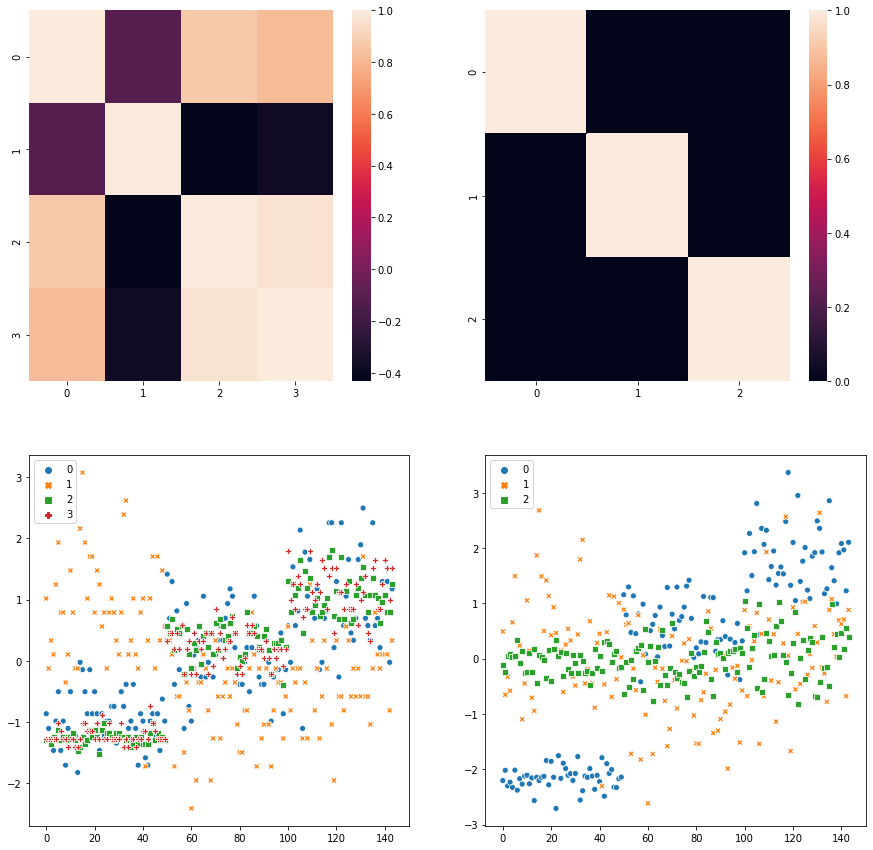

In [5]:
df_pc = pd.DataFrame(pc.components_, columns = df.columns)
fig,ax = plt.subplots(2,2,figsize=(15,15))

#Correlation between features before PCA
sns.heatmap(dfs.corr(), ax=ax[0,0],label='Old features')
sns.scatterplot(data=dfs,ax=ax[1,0])

#Correlation between features after PCA
sns.heatmap(pd.DataFrame(pca_tran).corr(), ax=ax[0,1],label='New features')
sns.scatterplot(data=pd.DataFrame(pca_tran))

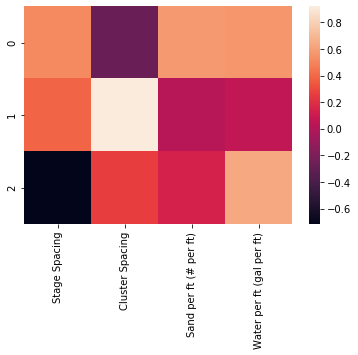

In [6]:
df_pc = pd.DataFrame(pc.components_, columns=df.columns)
sns.heatmap(df_pc)

In [7]:
names = ['First Component','Second Component','Third Component']
pd.DataFrame(pca_tran, columns = names).to_csv('Three principal components.csv')

In [8]:
scaler_norm = MinMaxScaler()
scaled_minmax = scaler_norm.fit_transform(df)
scaled_minmax = pd.DataFrame(scaled_minmax)

# NMF

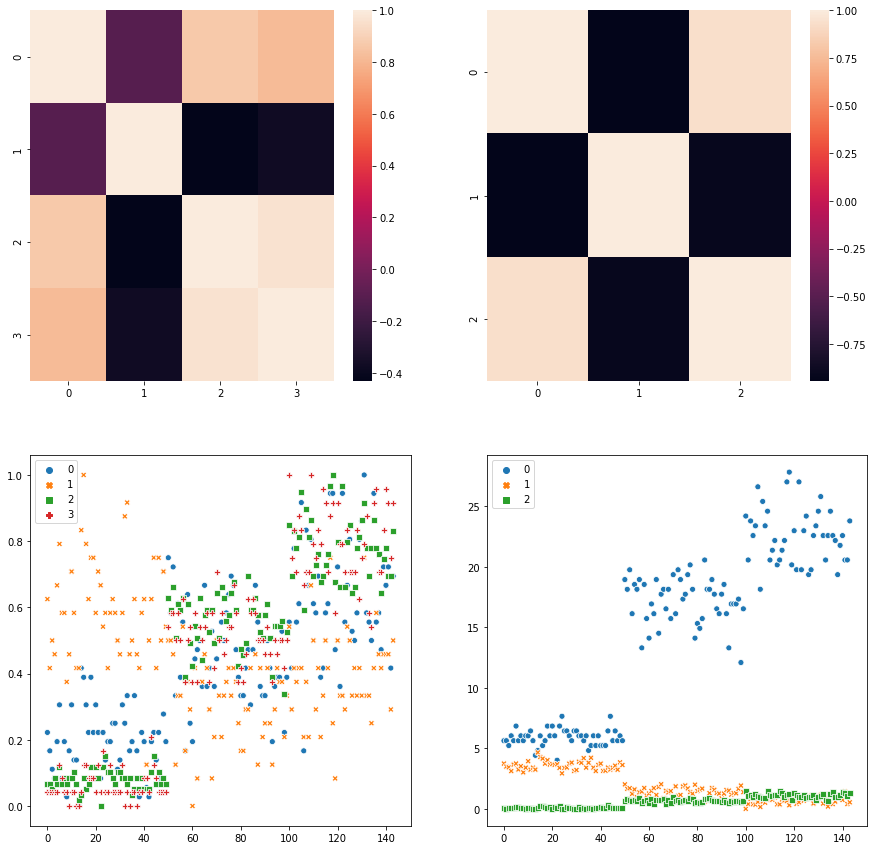

In [9]:
nmf = NMF(n_components=3)
nmf_tran = nmf.fit_transform(df)

fig1,ax1 = plt.subplots(2,2,figsize=(15,15))
#Correlation between features before PCA
sns.heatmap(scaled_minmax.corr(), ax=ax1[0,0],label='Old features')
sns.scatterplot(data=scaled_minmax,ax=ax1[1,0])

#Correlation between features after PCA
sns.heatmap(pd.DataFrame(nmf_tran).corr(), ax=ax1[0,1],label='New features')
sns.scatterplot(data=pd.DataFrame(nmf_tran))